<a href="https://colab.research.google.com/github/VojtasekP/NAEX-pendulum/blob/main/projects/01NAEX_HW01_pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01NAEX Project 01 - Pendulum study

Add your team name(s), members, and roles here (optional).

## Research Task

Design and run an experiment to investigate which factors affect the period of a simple pendulum. For small release angles, classical theory predicts the period T depends only on the string length L:

$T \approx 2*\pi*\sqrt{\frac{L}{g}} \ \ \text{for} \ \ |\theta| <= 10\text{deg}$

https://en.wikipedia.org/wiki/Pendulum_(mechanics)

That is, for small angles the period should be independent of the bob's weight (mass) and approximately independent of angle. Your goal is to build an experiment that confirms that weight is not a significant factor, while verifying the expected length effect. You may optionally probe how well the "small-angle" approximation holds by using a couple of small angle levels.

- Response variable: period T (seconds). Recommended protocol: time $N$ swings with a stopwatch and use $T = t_N / N$ to reduce reaction-time error.
- Primary factors:
  - Length $L$ (quantitative, choose >= 3 levels across your feasible range)
  - Weight $m$ (mass of the bob; choose 2-3 levels). Theory: no effect on $T$.
  - Release angle $\theta$ (small angles: e.g., 5, 10, 20 degrees; choose >= 2 levels to test the approximation)
- Optional nuisance/structure: operator (person), day/session, string type, pivot, ambient conditions. You may treat these as blocks or ignore them if you control them sufficiently.

You decide whether to randomize run order, include operators, blocking, or repeated measurements - justify your choices using **design of experiments reasoning**.

## Design Guidance

- Target the physics regime where the small-angle approximation is valid $(|\theta| \leq 10 deg)$. If you exceed this, discuss the implications.
- Plan replicates/repeated measurements to mitigate stopwatch error (e.g., 3 repeats per treatment or average of 10-20 swings per timing).
- If multiple operators participate, consider blocking by operator or using a mixed-effects model.
- Randomize run order if practical; if not, explain how you controlled time-related drift.
- Record all factor levels and the run order for traceability.
- Power: Aim for $\beta \leq 0.1$  to detect a 0.1s change in T between mass levels at $\alpha = 0.05$. Use a pilot SD (e.g., from 10 swings) to size the study.

## Submission

Submit by the deadline in PDF, Rmd, or ipynb (Python or R). Include raw data (I prefer a link to the data in the code) and your analysis code with outputs. Ensure the report is self-contained and reproducible.

## Tasks / Questions

1) Planning and design
- Define your factors and levels ($L$, $m$, $\theta$) and any nuisance variables (operators, sessions, etc.).
- Specify the response and the measurement protocol ($N$ swings per timing, repeats per treatment, instrumentation, units).
- State whether you will randomize or block; justify your choices.

2) Power and sample size (pre-study)
- Using a pilot SD (or a reasonable assumption), estimate how many replicates per treatment you need to achieve 80% power to detect a 2-3% change in $T$ between mass levels at $\alpha = 0.05$. State assumptions clearly.

3) Data collection and quality
- Report the full data table (with run order if randomized) and basic summaries (mean, SD) by factor level.
- Visualize the data (e.g., boxplots and mean+/-SE) across $L$, $m$, and $\theta$.

4) Primary analysis - ANOVA
- Fit an ANOVA model for $T$ with factors $L$, $m$, $\theta$. Consider interactions only if justified by design.
- Test and interpret the effect of weight $m$. Report F, df, and p-values.

5) ANOVA - multiple comparison (Tukey, LSD)
- Find out if there is significant difference in means between different levels of $L$, $m$, $\theta$.
- Can we confirm the assumption that the mass of the blob does not matter?
- Can we confirm the assumption that a small angle has no effect on the time T , but a larger one does?

6) Assumptions and diagnostics
- Provide residual plots (QQ-plot, residuals vs fitted, ...) and formal tests where relevant. Discuss any deviations and remedies.
- Discuss the effect of the experimental design and the evolution of the residuals over time (order of measurements).

7) Post-study power/reflection
- Based on the observed SD and estimates, re-calc the achieved power of the test in the ANOVA for different lenghts of ropes and corresponding measuremnts and other factors.
- Assume the difference in T we want to detect is 0.1s. Calculate the number of repetition needed for the power of the resulting test to be greater than 0.9.

8) Alternative model - regression with quantitative factors
- Fit a regression with T ~ sqrt(L) (or log T vs 0.5 log L) and include theta (as small quantitative) and m. Compare conclusions about m.
- Choose model with significant variables.

9) Conclusions
- Summarize whether the data support the theoretical result (T depends on L; m not significant at small angles). Provide a minimal recommended design that would convincingly demonstrate this in future labs.

10) (Optional) Estimate $g$
- Use your best model to estimate $g$ and provide an interval. Compare to 9.81 $m/s^2$.


### 1) Planning and design

**Experiment**
-------------------
* For measuring the angular deflection was used formula tg θ
* We defined N=5 swings per timing with 3 repeats per treatment
* Three operators measured time by stopwatch on the phone
* Overall, 81 measurements were performed

**Factors**
---------------
* Length (L) - 3 levels: 33 cm, 65,5 cm, 120 cm
* Weight (m) - 3 levels: 77 g, 139 g, 220 g
* Angle (θ) - 3 levels: 5 °, 10 ° 20 °



### 2) Power and sample size (pre-study)

### 3) Data collection and quality

In [12]:
import pandas as pd
url = "https://raw.githubusercontent.com/VojtasekP/NAEX-pendulum/refs/heads/main/NAEX_pendulum.csv?token=GHSAT0AAAAAADLORDBEPMTY246QDIZZH4IO2HNBSPA"
data = pd.read_csv(url)
print(data.head())
print("---------------------------------------------------------------------------------")
print(data.describe())


      L   m  angle  time_Sab  time_Flo  time_avg  period
0  65.5  77      5      8.06      8.10     8.080   1.616
1  65.5  77     10      8.24      8.23     8.235   1.647
2  65.5  77     20      8.19      8.23     8.210   1.642
3  33.0  77      5      5.83      5.26     5.545   1.109
4  33.0  77     10      5.88      6.00     5.940   1.188
---------------------------------------------------------------------------------
                L           m      angle   time_Sab   time_Flo   time_avg  \
count   27.000000   27.000000  27.000000  27.000000  27.000000  27.000000   
mean    72.833333  145.333333  11.666667   8.358519   8.326296   8.342407   
std     36.577894   59.666380   6.354889   2.172763   2.227633   2.197652   
min     33.000000   77.000000   5.000000   5.690000   5.260000   5.515000   
25%     33.000000   77.000000   5.000000   5.890000   5.945000   5.917500   
50%     65.500000  139.000000  10.000000   8.160000   8.150000   8.140000   
75%    120.000000  220.000000  20.000

In [13]:
T = data['period']
L= data['L']
m = data['m']
θ = data['angle']

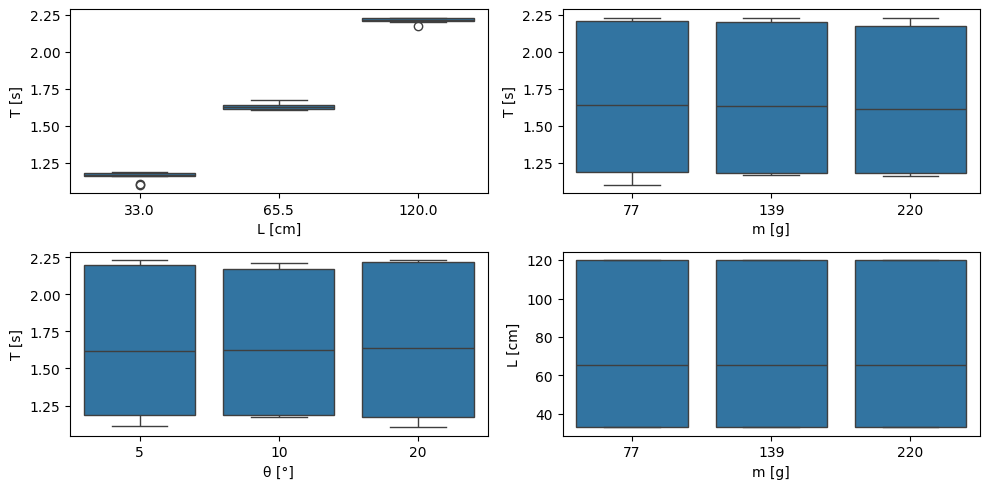

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
sns.boxplot(x=L, y=T, ax=axes[0, 0])
axes[0,0].set_xlabel("L [cm]")
axes[0,0].set_ylabel("T [s]")

sns.boxplot(x=m, y=T, ax=axes[0,1])
axes[0,1].set_xlabel("m [g]")
axes[0,1].set_ylabel("T [s]")

sns.boxplot(x=θ, y=T, ax=axes[1, 0])
axes[1,0].set_xlabel("θ [°]")
axes[1,0].set_ylabel("T [s]")

sns.boxplot(x=m, y=L, ax=axes[1,1])
axes[1,1].set_xlabel("m [g]")
axes[1,1].set_ylabel("L [cm]")

plt.tight_layout()
plt.show()

### 4) Primary analysis - ANOVA

### 5) Tukey, LSD

### 6) Assumptions and diagnostics

### 7) Post-study power/reflection

### 8) Alternative model - regression with quantitative factors

### 9) Conclusions

### 10) (Optional) Estimate g`